In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#Import Library

In [5]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

# Import Dataset

In [6]:
# Import dataset
df = pd.read_csv("datasetmobil.csv", encoding='latin1')
df

,model,tahun,harga,transmisi,kilometer,bahan_bakar,pajak,mpg,cc
0,Agya,2010,76000000,manual,160381,bensin,1800000,38.5,1.0
1,Agya,2010,78000000,matic,201098,bensin,1800001,38.5,1.0
2,Agya,2010,70000000,manual,211092,bensin,1800002,38.5,1.0
3,Agya,2010,80000000,matic,175011,bensin,1800003,38.5,1.0
4,Agya,2011,78000000,manual,190122,bensin,2000000,39.6,1.0
...,...,...,...,...,...,...,...,...,...
404,Corolla Cross,2022,700302100,matic,1002,hybrid,1650000,89.2,2.0
405,Corolla Cross,2022,702300101,matic,2100,hybrid,1650001,89.2,2.0
406,Corolla Cross,2023,703101200,matic,4923,hybrid,1650002,89.2,2.0
407,Corolla Cross,2023,760300000,matic,2301,ev,1200000,91.5,2.0


In [7]:
df.shape

(409, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        409 non-null    object 
 1   tahun        409 non-null    int64  
 2   harga        409 non-null    int64  
 3   transmisi    409 non-null    object 
 4   kilometer    409 non-null    int64  
 5   bahan_bakar  409 non-null    object 
 6   pajak        409 non-null    int64  
 7   mpg          409 non-null    float64
 8   cc           409 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 28.9+ KB


In [9]:
df.describe()

,tahun,harga,kilometer,pajak,mpg,cc
count,409.00000,4.090000e+02,409.000000,4.090000e+02,409.000000,409.000000
mean,2016.92665,2.122355e+08,77736.305623,2.558102e+06,46.584597,1.602934
std,4.26333,1.509074e+08,74188.367148,6.335385e+05,12.851025,0.516294
min,2005.00000,7.000000e+07,122.000000,1.200000e+06,36.500000,1.000000
25%,2014.00000,1.103031e+08,21030.000000,2.150007e+06,39.900000,1.200000
50%,2018.00000,1.652031e+08,48772.000000,2.500004e+06,42.300000,1.500000
75%,2020.00000,2.503222e+08,120233.000000,3.200002e+06,46.600000,2.000000
max,2023.00000,7.703000e+08,299172.000000,3.860000e+06,91.500000,2.500000


In [10]:
df.isnull().sum()

model          0
tahun          0
harga          0
transmisi      0
kilometer      0
bahan_bakar    0
pajak          0
mpg            0
cc             0
dtype: int64

In [11]:
df.duplicated().sum()

0

#EDA

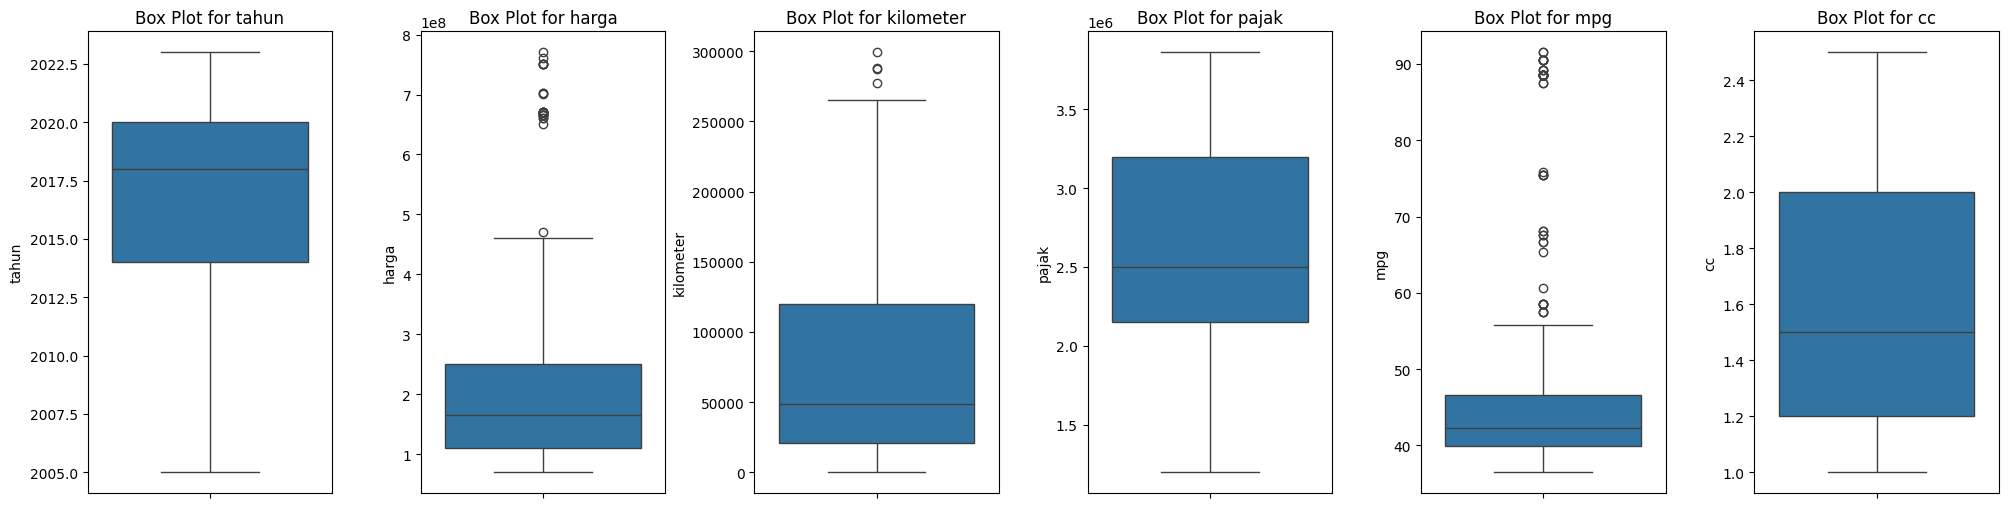

In [12]:
# mengecek outliers menggunakan box plot
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [13]:
# Handling outlier
# Tentukan kolom yang akan dipertimbangkan
kolom_yang_dipertimbangkan = ['mpg', 'kilometer', 'harga']

# Hitung IQR untuk kolom-kolom yang sudah ditentukan
Q1 = df[kolom_yang_dipertimbangkan].quantile(0.25)
Q3 = df[kolom_yang_dipertimbangkan].quantile(0.75)
IQR = Q3 - Q1

# Filter outlier untuk kolom-kolom yang sudah ditentukan
new_df = df[~((df[kolom_yang_dipertimbangkan] < (Q1 - 1.5 * IQR)) | (df[kolom_yang_dipertimbangkan] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Periksa ukuran dataset setelah menghapus outlier
new_df.shape

(358, 9)

In [14]:
new_df

,model,tahun,harga,transmisi,kilometer,bahan_bakar,pajak,mpg,cc
0,Agya,2010,76000000,manual,160381,bensin,1800000,38.5,1.0
1,Agya,2010,78000000,matic,201098,bensin,1800001,38.5,1.0
2,Agya,2010,70000000,manual,211092,bensin,1800002,38.5,1.0
3,Agya,2010,80000000,matic,175011,bensin,1800003,38.5,1.0
4,Agya,2011,78000000,manual,190122,bensin,2000000,39.6,1.0
...,...,...,...,...,...,...,...,...,...
379,Corolla Cross,2018,380102000,matic,39912,bensin,2900000,46.2,1.8
380,Corolla Cross,2018,390102200,matic,38812,bensin,2900001,46.2,1.8
381,Corolla Cross,2018,400000000,matic,38041,bensin,2900002,46.2,1.8
382,Corolla Cross,2018,410202000,manual,45012,bensin,2900003,46.2,1.8


<Axes: >

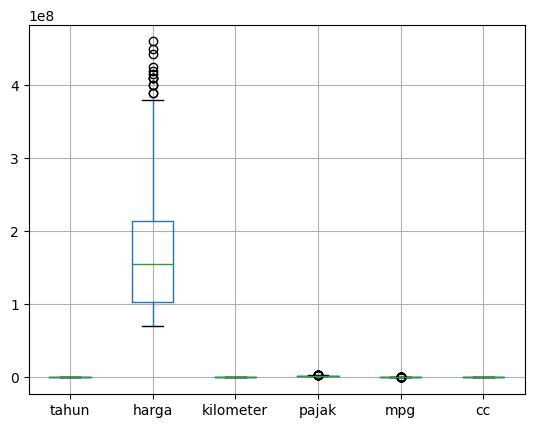

In [15]:
new_df.boxplot()

In [16]:
new_df['tahun'].value_counts()

tahun
2023    31
2020    30
2019    29
2014    27
2018    26
2013    25
2015    25
2021    25
2012    24
2016    24
2022    24
2017    21
2011    20
2010    12
2009     6
2006     3
2005     2
2007     2
2008     2
Name: count, dtype: int64

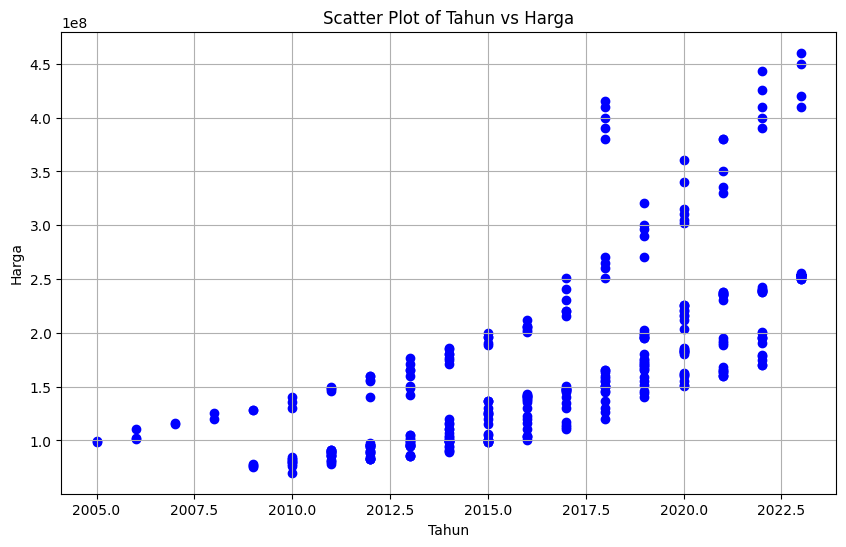

In [17]:
# Scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(new_df['tahun'], new_df['harga'], color='blue')
plt.title('Scatter Plot of Tahun vs Harga')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

# Data Preprocessing

In [18]:
le_model = LabelEncoder()
le_transmisi = LabelEncoder()
le_bahan_bakar = LabelEncoder()

new_df['model_encoded'] = le_model.fit_transform(new_df['model'])
new_df['transmisi_encoded'] = le_transmisi.fit_transform(new_df['transmisi'])
new_df['bahan_bakar_encoded'] = le_bahan_bakar.fit_transform(new_df['bahan_bakar'])

C:\Users\Inspiron\AppData\Local\Temp\ipykernel_19520\2067529156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['model_encoded'] = le_model.fit_transform(new_df['model'])
C:\Users\Inspiron\AppData\Local\Temp\ipykernel_19520\2067529156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['transmisi_encoded'] = le_transmisi.fit_transform(new_df['transmisi'])
C:\Users\Inspiron\AppData\Local\Temp\ipykernel_19520\2067529156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 383
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                358 non-null    object 
 1   tahun                358 non-null    int64  
 2   harga                358 non-null    int64  
 3   transmisi            358 non-null    object 
 4   kilometer            358 non-null    int64  
 5   bahan_bakar          358 non-null    object 
 6   pajak                358 non-null    int64  
 7   mpg                  358 non-null    float64
 8   cc                   358 non-null    float64
 9   model_encoded        358 non-null    int32  
 10  transmisi_encoded    358 non-null    int32  
 11  bahan_bakar_encoded  358 non-null    int32  
dtypes: float64(2), int32(3), int64(4), object(3)
memory usage: 32.2+ KB


In [20]:
scaler = StandardScaler()

new_df['kilometer_scaled'] = new_df['kilometer'] / 1000  # Scale by 1,000
new_df['harga_scaled'] = new_df['harga'] / 1000000  # Scale by 1,000,000
new_df['pajak_scaled'] = new_df['pajak'] / 1000000  # Scale by 1,000,000

features = ['model_encoded', 'tahun', 'transmisi_encoded', 'kilometer_scaled', 'bahan_bakar_encoded', 'pajak_scaled', 'mpg', 'cc']
X = new_df[features]
y = new_df['harga_scaled']
X_scaled = scaler.fit_transform(X)

C:\Users\Inspiron\AppData\Local\Temp\ipykernel_19520\107320488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['kilometer_scaled'] = new_df['kilometer'] / 1000  # Scale by 1,000
C:\Users\Inspiron\AppData\Local\Temp\ipykernel_19520\107320488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['harga_scaled'] = new_df['harga'] / 1000000  # Scale by 1,000,000
C:\Users\Inspiron\AppData\Local\Temp\ipykernel_19520\107320488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [21]:
X.shape, y.shape

((358, 8), (358,))

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model

In [23]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [24]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluation

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2: {r2}')

Mean Squared Error: 102.09534751969392
Mean Absolute Error: 6.340127541666664
R2: 0.9859755846464012


In [26]:
# Example user input for prediction
user_input = {
    'model': ['Agya'],
    'tahun': [2015],
    'transmisi': ['matic'],
    'kilometer': [154765],
    'bahan_bakar': ['bensin'],
    'pajak': [2200002],
    'mpg': [40.4],
    'cc': [1]
}
user_df = pd.DataFrame(user_input)

In [27]:
user_df['model_encoded'] = le_model.transform(user_df['model'])
user_df['transmisi_encoded'] = le_transmisi.transform(user_df['transmisi'])
user_df['bahan_bakar_encoded'] = le_bahan_bakar.transform(user_df['bahan_bakar'])

user_df['kilometer_scaled'] = user_df['kilometer'] / 1000  # Scale by 1,000
user_df['pajak_scaled'] = user_df['pajak'] / 1000000  # Scale by 1,000,000

In [28]:
user_features = ['model_encoded', 'tahun', 'transmisi_encoded', 'kilometer_scaled', 'bahan_bakar_encoded', 'pajak_scaled', 'mpg', 'cc']
user_X = user_df[user_features]
user_X_scaled = scaler.transform(user_X)

In [29]:
# Predict the price
user_pred_scaled  = knn.predict(user_X_scaled)
user_pred = user_pred_scaled * 1000000  # Convert back to original scale
print(f'Predicted price (in millions): {user_pred[0]}')

Predicted price (in millions): 94211412.0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X)

d:\SEM 6\DEV\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [32]:
data_diskalaan_uji = scaler.transform(X_test)

In [33]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr)

Mean Squared Error: 102.11


In [35]:
# load model
with open("model_knn.pkl", "rb") as model_file:
    model_knn = pickle.load(model_file)

In [36]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
